# TPS September 2022

In [171]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# from sklearn import preprocessing, metrics, model_selection

import warnings

plt.style.use('dark_background')
warnings.warn('ignore')

/var/folders/d_/7kf0v4591t1_j404ld5qvmg40000gn/T/ipykernel_20283/3788763230.py:12: UserWarning: ignore
  warnings.warn('ignore')


In [172]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [173]:
train.describe(include='all')

,row_id,date,country,store,product,num_sold
count,70128.000000,70128,70128,70128,70128,70128.000000
unique,NaN,1461,6,2,4,NaN
top,NaN,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,NaN
freq,NaN,48,11688,35064,17532,NaN
mean,35063.500000,NaN,NaN,NaN,NaN,194.296986
std,20244.354176,NaN,NaN,NaN,NaN,126.893874
min,0.000000,NaN,NaN,NaN,NaN,19.000000
25%,17531.750000,NaN,NaN,NaN,NaN,95.000000
50%,35063.500000,NaN,NaN,NaN,NaN,148.000000
75%,52595.250000,NaN,NaN,NaN,NaN,283.000000


In [174]:
for col in ['product','country','store']:
    print(col, ":", train[col].unique())

product : ['Kaggle Advanced Techniques' 'Kaggle Getting Started'
 'Kaggle Recipe Book' 'Kaggle for Kids: One Smart Goose']
country : ['Belgium' 'France' 'Germany' 'Italy' 'Poland' 'Spain']
store : ['KaggleMart' 'KaggleRama']


<AxesSubplot:>

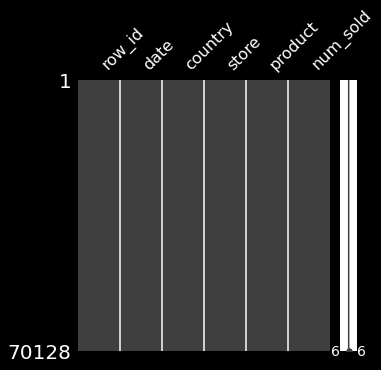

In [175]:
msno.matrix(train, figsize=(5,5))

In [176]:
test.describe(include='all')

,row_id,date,country,store,product
count,17520.000000,17520,17520,17520,17520
unique,NaN,365,6,2,4
top,NaN,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
freq,NaN,48,2920,8760,4380
mean,78887.500000,NaN,NaN,NaN,NaN
std,5057.732694,NaN,NaN,NaN,NaN
min,70128.000000,NaN,NaN,NaN,NaN
25%,74507.750000,NaN,NaN,NaN,NaN
50%,78887.500000,NaN,NaN,NaN,NaN
75%,83267.250000,NaN,NaN,NaN,NaN


In [177]:
for col in ['product','country','store']:
    print(col, ":", test[col].unique())

product : ['Kaggle Advanced Techniques' 'Kaggle Getting Started'
 'Kaggle Recipe Book' 'Kaggle for Kids: One Smart Goose']
country : ['Belgium' 'France' 'Germany' 'Italy' 'Poland' 'Spain']
store : ['KaggleMart' 'KaggleRama']


<AxesSubplot:>

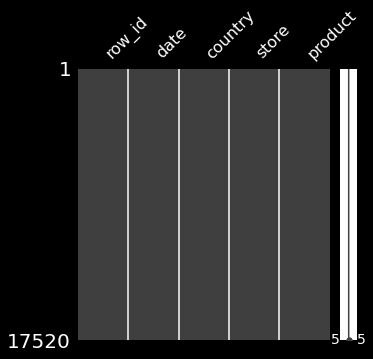

In [178]:
msno.matrix(test, figsize=(5,5))

In [179]:
# *SOME EDA WAS DONE IN TABLEAU*

/var/folders/d_/7kf0v4591t1_j404ld5qvmg40000gn/T/ipykernel_20283/2208651624.py:31: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train["period"] = train['date'].dt.week


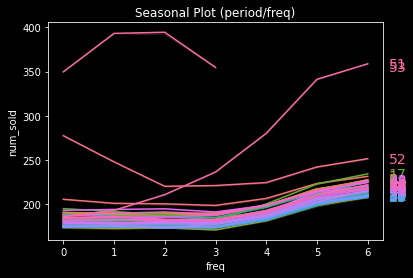

In [180]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

train['date'] = pd.to_datetime(train['date'])
train["period"] = train['date'].dt.week
train["freq"] = train['date'].dt.dayofweek
seasonal_plot(train, y='num_sold', period="period", freq="freq")
plt.show()

/var/folders/d_/7kf0v4591t1_j404ld5qvmg40000gn/T/ipykernel_20283/3141867774.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['freq'] = train['date'].dt.weekofyear


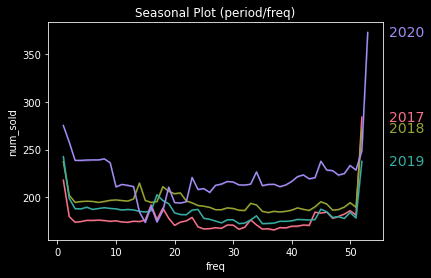

In [181]:
train['period'] = train['date'].dt.year
train['freq'] = train['date'].dt.weekofyear
seasonal_plot(train, y='num_sold', period='period', freq='freq')

train.drop(columns=['period','freq'], inplace=True)

<AxesSubplot:title={'center':'Rolling Average of Sales'}, xlabel='date'>

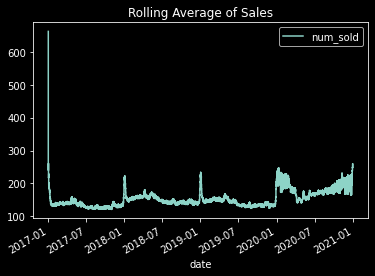

In [182]:
roll_sold = train.loc[:,['date','num_sold']]
roll_sold.set_index('date',inplace=True)
roll_sold.rolling(window=366, min_periods=0).median().plot(title='Rolling Average of Sales')

## Feature Engineering

Ideas:
- week number or day of year (yearly seasonality)
- day of week (weekly seasonality)
- public holidays (if data supports) (how detailed?)
- make that seasonality chart
- courier features
- ...

In [183]:
from sklearn import preprocessing

def preprocess(df):
    df_copy = df.__deepcopy__()
    
    # One-Hot Encode the categorical columns
    categorical_cols = ['product','country','store']
    
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    for col in categorical_cols:
        data = df_copy[[col]]
        encoded_df = pd.DataFrame(enc.fit_transform(data).toarray())
        encoded_df.columns = enc.get_feature_names_out()
        df_copy = df_copy.join(pd.DataFrame(encoded_df))
    df_copy.drop(columns=categorical_cols, inplace=True)
    
    # Add seasonality data
    df_copy['year'] = df_copy['date'].dt.year
    df_copy['month'] = df_copy['date'].dt.month
    df_copy['week_of_year'] = df_copy['date'].dt.weekofyear
    df_copy['day_of_week'] = df_copy['date'].dt.day_of_week
    df_copy.drop(columns=['date'], inplace=True)
    
    # Add Calendar Courier features
    # ...
        
    return df_copy

In [184]:
train = preprocess(train)
train.head()

/var/folders/d_/7kf0v4591t1_j404ld5qvmg40000gn/T/ipykernel_20283/2689047865.py:20: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_copy['week_of_year'] = df_copy['date'].dt.weekofyear


,row_id,num_sold,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,year,month,week_of_year,day_of_week
0,0,663,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017,1,52,6
1,1,615,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017,1,52,6
2,2,480,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017,1,52,6
3,3,710,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017,1,52,6
4,4,240,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017,1,52,6


In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   row_id                                    70128 non-null  int64  
 1   num_sold                                  70128 non-null  int64  
 2   product_Kaggle Advanced Techniques        70128 non-null  float64
 3   product_Kaggle Getting Started            70128 non-null  float64
 4   product_Kaggle Recipe Book                70128 non-null  float64
 5   product_Kaggle for Kids: One Smart Goose  70128 non-null  float64
 6   country_Belgium                           70128 non-null  float64
 7   country_France                            70128 non-null  float64
 8   country_Germany                           70128 non-null  float64
 9   country_Italy                             70128 non-null  float64
 10  country_Poland                    

In [186]:
y_train = train['num_sold']
X_train = train.drop(columns=['num_sold'])

In [187]:
from sklearn import linear_model, ensemble
import xgboost

models_dict = {
    'lin': linear_model.LinearRegression(),
    'rf': ensemble.RandomForestRegressor(),
    'xgb': xgboost.XGBRegressor()
}

In [200]:
%%capture
from sklearn import model_selection, metrics

scores_dict = dict()

for regr_name in models_dict:
    regr = models_dict[regr_name]
    y_pred = model_selection.cross_val_predict(
        estimator=regr, 
        X=X_train, 
        y=y_train, 
        cv=5)
    score = metrics.mean_absolute_percentage_error(y_train, y_pred)
    
    scores_dict[regr_name] = {
        'score': score
    }

In [201]:
for regr in scores_dict:
    arr = scores_dict[regr]['score']
    print(f"{regr:6}: {np.mean(arr):.4f} || {arr}")
    
print(np.mean(score))

lin   : 0.3334 || 0.3333540021162464
rf    : 0.1192 || 0.11917899091977169
xgb   : 0.1089 || 0.1089122505811304
0.1089122505811304


In [210]:
test['date'] = pd.to_datetime(test['date'])
X_test = preprocess(test)

regr = models_dict['xgb']
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

/var/folders/d_/7kf0v4591t1_j404ld5qvmg40000gn/T/ipykernel_20283/2689047865.py:20: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_copy['week_of_year'] = df_copy['date'].dt.weekofyear


In [212]:
output = pd.DataFrame({'id': X_test.index, 'num_sold': y_pred})
output.to_csv('pred.csv', index=False)
print("output exported")

output exported
